In [3]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import optuna
from tqdm import tqdm

In [4]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import optuna
from tqdm import tqdm

# Generate some sample data
np.random.seed(0)
X = np.random.randn(100, 10)
y = X @ np.random.randn(10) + np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the objective function for hyperparameter optimization
def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1e1)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Perform hyperparameter optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Train the final model with the best hyperparameters
best_alpha = study.best_params['alpha']
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = ridge.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print(f"Best Alpha: {best_alpha}")
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {ridge.coef_}")


[I 2024-07-01 12:35:01,303] A new study created in memory with name: no-name-c2840c6c-b97f-45c6-a65c-2708368062c2
C:\Users\ropar_i9941t3\AppData\Local\Temp\ipykernel_16344\1283040667.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e1)
[I 2024-07-01 12:35:01,320] Trial 0 finished with value: 1.1506553464156193 and parameters: {'alpha': 2.219440807537608}. Best is trial 0 with value: 1.1506553464156193.
C:\Users\ropar_i9941t3\AppData\Local\Temp\ipykernel_16344\1283040667.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e1)
[I 2024-07-01 12:35:01,328] Trial 1 finished

Best Alpha: 9.979377600224016
Mean Squared Error: 1.1222419033587898
Coefficients: [ 0.644046    0.66986479 -0.40287813  0.10901318  0.33324333  0.19834772
  0.50214606 -1.67707356 -0.08505517  0.14289609]


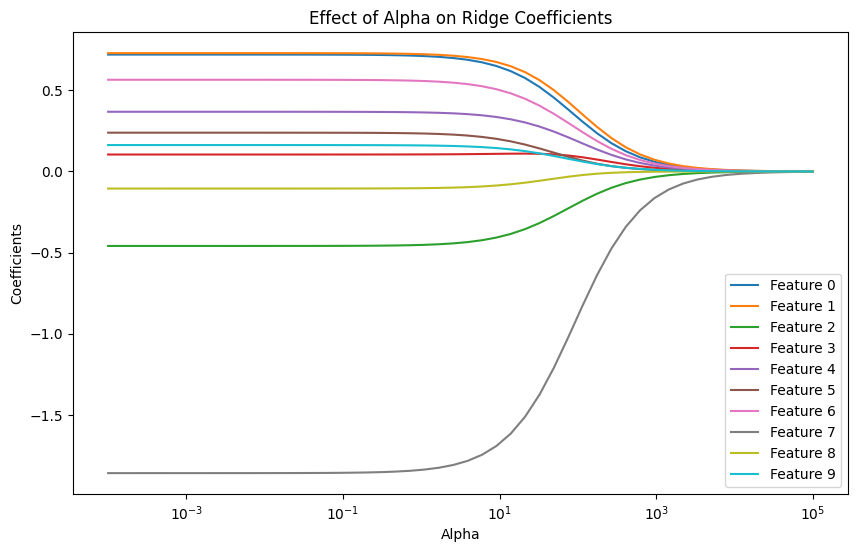

Coefficients for very large alpha values:
Alpha: 1000.0, Coefficients: [ 0.05719814  0.06932762 -0.03233291  0.02195208  0.03475602  0.0095139
  0.04653747 -0.15676795 -0.00139549  0.01018203]
Alpha: 10000.0, Coefficients: [ 6.17385918e-03  7.56409278e-03 -3.46272496e-03  2.50098968e-03
  3.81118775e-03  9.66491827e-04  5.05800214e-03 -1.69678061e-02
 -9.16094292e-05  1.06924658e-03]
Alpha: 100000.0, Coefficients: [ 6.22338057e-04  7.63357677e-04 -3.48752108e-04  2.53562274e-04
  3.84836868e-04  9.67745989e-05  5.10246484e-04 -1.71087600e-03
 -8.58613331e-06  1.07450245e-04]


In [5]:
import matplotlib.pyplot as plt

# Define a range of alpha values
alphas = np.logspace(-4, 5, 50)  # Extended the range to include very large values

# Store the coefficients for each alpha value
coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# Plot the effect of alpha on the coefficients
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Effect of Alpha on Ridge Coefficients')
plt.legend([f'Feature {i}' for i in range(X.shape[1])], loc='best')
plt.show()

# Show that even with very large alpha values, coefficients do not become zero
print("Coefficients for very large alpha values:")
for alpha in [1e3, 1e4, 1e5]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    print(f"Alpha: {alpha}, Coefficients: {ridge.coef_}")